# Dlib and MTCNN face detectors


In [ ]:
# No need to clone the repo, but in case someone wants to inspect the code.
!git clone https://github.com/ipazc/mtcnn.git
!git clone https://github.com/ageitgey/face_recognition.git  

In [ ]:
!apt-get install build-essential cmake
!apt-get install libopenblas-dev liblapack-dev 
!pip3 install dlib
!pip3 install face_recognition

In [ ]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

In [ ]:
!ls -la face_recognition/tests/test_images/

total 3152
drwxr-xr-x 2 root root   4096 Apr 26 06:04 .
drwxr-xr-x 3 root root   4096 Apr 26 06:04 ..
-rw-r--r-- 1 root root 887446 Apr 26 06:04 32bit.png
-rw-r--r-- 1 root root 353723 Apr 26 06:04 biden.jpg
-rw-r--r-- 1 root root 184455 Apr 26 06:04 obama2.jpg
-rw-r--r-- 1 root root 595944 Apr 26 06:04 obama3.jpg
-rw-r--r-- 1 root root 279922 Apr 26 06:04 obama.jpg
-rw-r--r-- 1 root root 478346 Apr 26 06:04 obama_partial_face2.jpg
-rw-r--r-- 1 root root 423060 Apr 26 06:04 obama_partial_face.jpg


**Timing the MTCNN Detector**

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2

filename = "face_recognition/tests/test_images/obama2.jpg"
img = cv2.imread(filename)
detector = MTCNN()

Using TensorFlow backend.


In [ ]:
%%timeit

face_locations = detector.detect_faces(img)

The slowest run took 59.79 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 110 ms per loop


In [ ]:
detector.detect_faces(img)

[{'box': [191, 253, 270, 351],
  'confidence': 0.999854564666748,
  'keypoints': {'left_eye': (247, 371),
   'mouth_left': (249, 522),
   'mouth_right': (351, 530),
   'nose': (289, 441),
   'right_eye': (370, 381)}}]

**Timing the Dlib-based Face Detector**

In [ ]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file(filename)

In [ ]:
%%timeit 

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

1 loop, best of 3: 488 ms per loop


Found 1 face(s) in this photograph.
A face is located at pixel location Top: 290, Left: 171, Bottom: 558, Right: 438


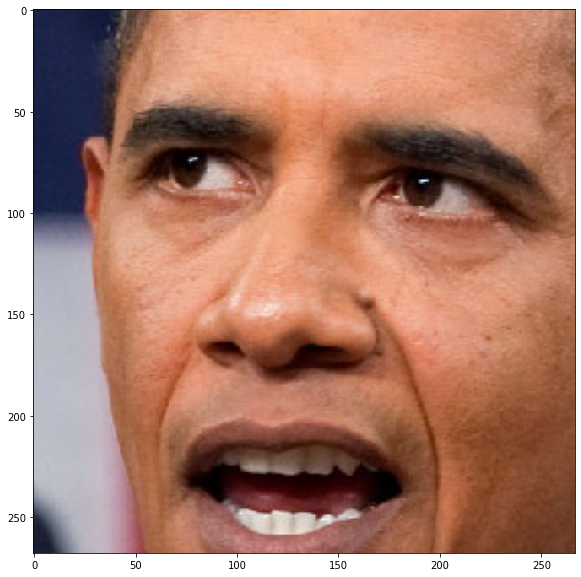

In [ ]:
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

face_locations = face_recognition.face_locations(image)

print("Found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()